In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import skew

## Gaussian Distribution

>A distribution of data refers to the shape it has when you graph it, such as with a histogram. The most commonly seen and therefore well-known distribution of continuous values is the bell curve. It is known as the normal distribution, because it the distribution that a lot of data falls into. It is also known as the Gaussian distribution, more formally, named for Carl Friedrich Gauss. As such, you will see references to data being normally distributed or Gaussian, which are interchangeable, both referring to the same thing: that the data looks like the Gaussian distribution. Some examples of observations that have a Gaussian distribution include:

### Sample vs Population
>We can think of data being generated by some unknown process. The data that we collect is called a data sample, whereas all possible data that could be collected is called the population.

>>Data Sample: A subset of observations from a group.

>>Data Population: All possible observations from a group.

>This is an important distinction because different statistical methods are used on samples vs populations, and in applied machine learning, we are often working with samples of data. If you read or use the word population when talking about data in machine learning, it very likely means sample when it comes to statistical methods.
Two examples of data samples that you will encounter in machine learning include:
>>The train and test datasets.

>>The performance scores for a model.

### Test Dataset

In [2]:
np.random.seed(1)

In [3]:
data = 5 * np.random.randn(10000) + 50

### Central Tendency
>The central tendency of a distribution refers to the middle or typical value in the distribution. The most common or most likely value. In the Gaussian distribution, the central tendency is called the mean, or more formally, the arithmetic mean, and is one of the two main parameters that defines any Gaussian distribution. The mean of a sample is calculated as the sum of the observations divided by the total number of observations in the sample.

>Measures of central tendency include mean, median, and the mode, while the measures of variability include standard deviation, variance, and the interquartile range.

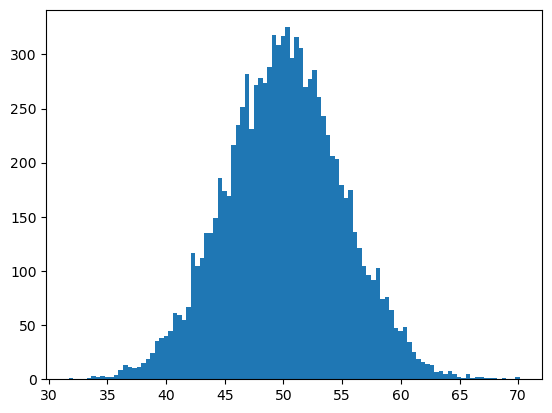

In [4]:
plt.hist(data,bins=100)
plt.show()

### Measures of Dispersion
>as we have seen in the data, the values of these measures differ for many variables. This is because of the extent to which a distribution is stretched or squeezed. In statistics, this is measured by dispersion which is also referred to as variability, scatter, or spread. The most popular measures of dispersion are standard deviation, variance, and the interquartile range.

>>#### Standard Deviation
>Standard deviation is a measure that is used to quantify the amount of variation of a set of data values from its mean. A low standard deviation for a variable indicates that the data points tend to be close to its mean, and vice versa. 

In [5]:
print('Standard Deviation: %.3f' % np.std(data))

Standard Deviation: 4.994


>>#### Variance
>The variance of a distribution refers to how much on average that observations vary or differ from the mean value. It is useful to think of the variance as a measure of the spread of a distribution. A low variance will have values grouped around the mean (e.g. a narrow bell shape), whereas a high variance will have values spread out from the mean (e.g. a wide bell shape.) We can demonstrate this with an example, by plotting idealized Gaussians with low and high variance. The complete example is listed below.

In [6]:
print('Variance: %.3f' % np.var(data))

Variance: 24.939


>>#### Interquartile Range (IQR)
>The Interquartile Range (IQR) is a measure of statistical dispersion, and is calculated as the difference between the upper quartile (75th percentile) and the lower quartile (25th percentile). The IQR is also a very important measure for identifying outliers and could be visualized using a boxplot.

In [7]:
# np.percentile(data, 75) - np.percentile(data, 25)
q75, q25 = np.percentile(data, [75 ,25])
iqr = q75 - q25
print('InterQuartile Range(IQR): %.3f' % iqr) 

InterQuartile Range(IQR): 6.674


In [8]:
print('Mean: %.3f' % np.mean(data))

Mean: 50.049


In [9]:
print('Median: %.3f' % np.median(data))

Median: 50.042


>>#### Skewness
>Another useful statistic is skewness, which is the measure of the symmetry, or lack of it, for a real-valued random variable about its mean. The skewness value can be positive, negative, or undefined. In a perfectly symmetrical distribution, the mean, the median, and the mode will all have the same value. However, the variables in our data are not symmetrical, resulting in different values of the central tendency.

In [10]:
skew(data)

0.024904571281318722

In [11]:
x_axis = np.arange(-3, 3, 0.1)

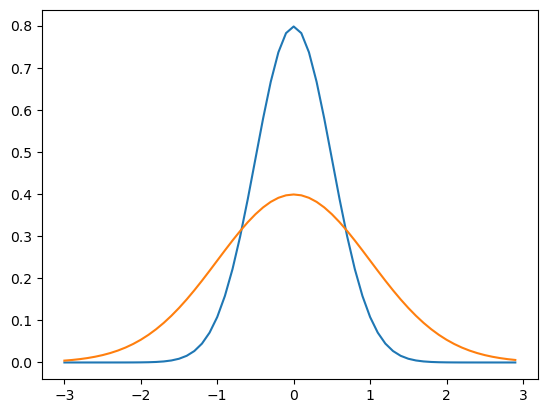

In [12]:
## plot low variance
plt.plot(x_axis, norm.pdf(x_axis, 0, 0.5))
# plot high variance
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.show()

Running the example plots two idealized Gaussian distributions: the blue with a low variance grouped around the mean and the orange with a higher variance with more spread.

## Describing a Gaussian
>In applied machine learning, you will often need to report the results of an algorithm. That is, report the estimated skill of the model on out-of-sample data. This is often done by reporting the mean performance from a k-fold cross-validation, or some other repeated sampling procedure. When reporting model skill, you are in effect summarizing the distribution of skill scores, and very likely the skill scores will be drawn from a Gaussian distribution.
It is common to only report the mean performance of the model. This would hide two other important details of the distribution of the skill of the model. As a minimum I would recommend reporting the two parameters of the Gaussian distribution of model scores and the size of the sample. Ideally, it would also be a good idea to confirm that indeed the model skill scores are Gaussian or look Gaussian enough to defend reporting the parameters of the Gaussian distribution. This is important because the distribution of skill scores can be reconstructed by readers and potentially compared to the skill of models on the same problem in the future.